In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,mean_squared_error,mean_absolute_error,explained_variance_score
from tensorflow.keras import models,layers
import warnings

#  Loading Data

In [14]:
warnings.simplefilter(action='ignore', category=FutureWarning)
house=pd.read_csv('../Data/kc_house_data.csv')
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [12]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#  Data Checking

In [9]:
house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


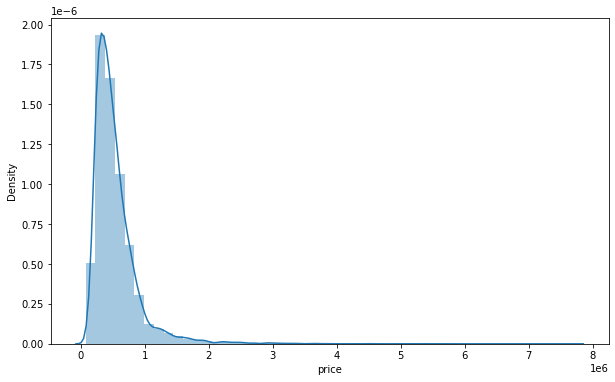

In [16]:
plt.figure(figsize=(10,6))
sns.distplot(house['price']);

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

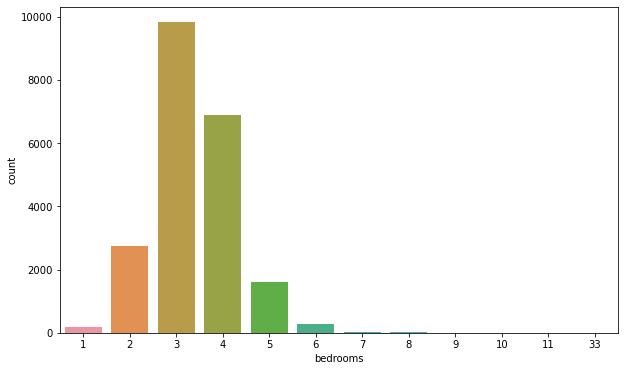

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(house['bedrooms'])

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

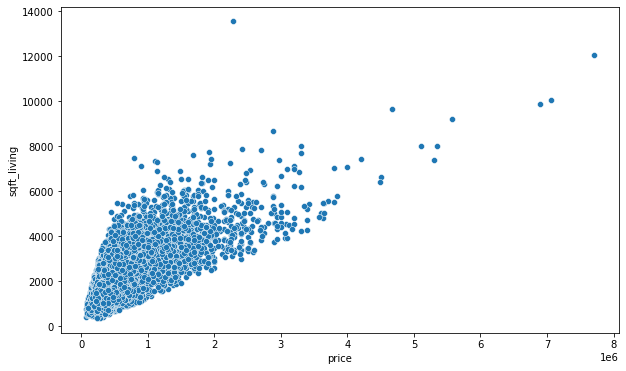

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='sqft_living',data=house)

<AxesSubplot:xlabel='price', ylabel='sqft_lot'>

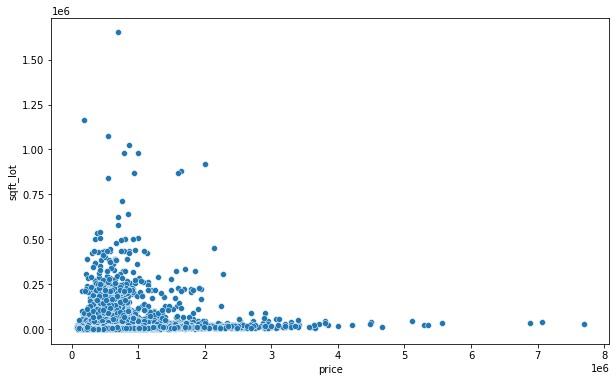

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='sqft_lot',data=house)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

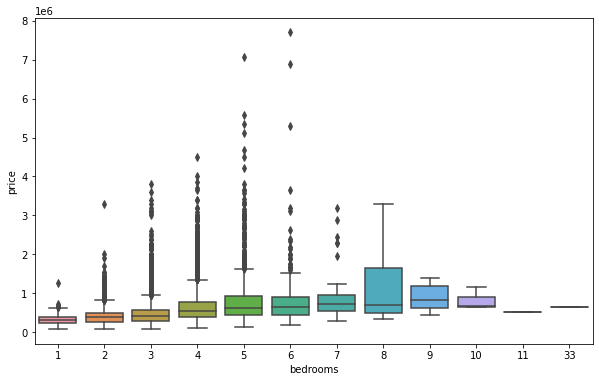

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(y='price',x='bedrooms',data=house)

<AxesSubplot:xlabel='long', ylabel='lat'>

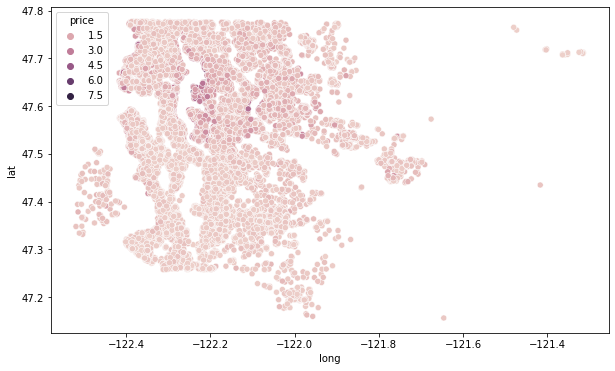

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',hue='price',data=house)

# Data Cleaning

In [30]:
house['date']=pd.to_datetime(house['date'])
house['year']=house['date'].apply(lambda time:time.year)
house['month']=house['date'].apply(lambda month:month.month)
house=house.drop('date',axis=1)
house=house.drop('zipcode',axis=1)
X=house.drop('price',axis=1).values
house.head()

<AxesSubplot:xlabel='month', ylabel='price'>

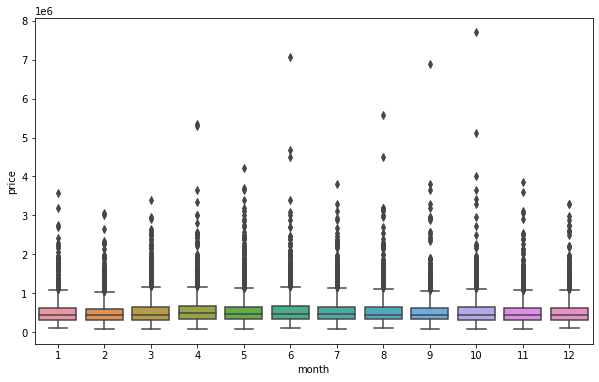

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=house)

In [44]:
y=house['price'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Designing Deep CNN model

In [50]:
model=models.Sequential()
model.add(layers.Dense(19,activation='relu'))
model.add(layers.Dense(19,activation='relu'))
model.add(layers.Dense(19,activation='relu'))
model.add(layers.Dense(19,activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam',loss='mse')
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
127/127 [==============================] - 1s 3ms/step - loss: 427182325760.0000 - val_loss: 425886515200.0000
Epoch 2/400
127/127 [==============================] - 0s 2ms/step - loss: 426443374592.0000 - val_loss: 423199866880.0000
Epoch 3/400
127/127 [==============================] - 0s 1ms/step - loss: 414995972096.0000 - val_loss: 396377292800.0000
Epoch 4/400
127/127 [==============================] - 0s 1ms/step - loss: 355076440064.0000 - val_loss: 295964770304.0000
Epoch 5/400
127/127 [==============================] - 0s 1ms/step - loss: 219843477504.0000 - val_loss: 149195390976.0000
Epoch 6/400
127/127 [==============================] - 0s 1ms/step - loss: 114533072896.0000 - val_loss: 102734831616.0000
Epoch 7/400
127/127 [==============================] - 0s 1ms/step - loss: 97787912192.0000 - val_loss: 100356612096.0000
Epoch 8/400
127/127 [==============================] - 0s 1ms/step - loss: 96117268480.0000 - val_loss: 98797535232.0000
Epoch 9/400
127/127

Epoch 135/400
127/127 [==============================] - 0s 2ms/step - loss: 31962540032.0000 - val_loss: 34538512384.0000
Epoch 136/400
127/127 [==============================] - 0s 2ms/step - loss: 31928561664.0000 - val_loss: 34519797760.0000
Epoch 137/400
127/127 [==============================] - 0s 2ms/step - loss: 31904468992.0000 - val_loss: 34468372480.0000
Epoch 138/400
127/127 [==============================] - 0s 2ms/step - loss: 31882717184.0000 - val_loss: 34434670592.0000
Epoch 139/400
127/127 [==============================] - 0s 2ms/step - loss: 31854587904.0000 - val_loss: 34428268544.0000
Epoch 140/400
127/127 [==============================] - 0s 2ms/step - loss: 31860611072.0000 - val_loss: 34442567680.0000
Epoch 141/400
127/127 [==============================] - 0s 2ms/step - loss: 31828584448.0000 - val_loss: 34346108928.0000
Epoch 142/400
127/127 [==============================] - 0s 2ms/step - loss: 31788382208.0000 - val_loss: 34313287680.0000
Epoch 143/400
12

127/127 [==============================] - 0s 2ms/step - loss: 29572753408.0000 - val_loss: 32108744704.0000
Epoch 268/400
127/127 [==============================] - 0s 2ms/step - loss: 29537658880.0000 - val_loss: 32090763264.0000
Epoch 269/400
127/127 [==============================] - 0s 2ms/step - loss: 29534906368.0000 - val_loss: 32156047360.0000
Epoch 270/400
127/127 [==============================] - 0s 2ms/step - loss: 29511749632.0000 - val_loss: 32171681792.0000
Epoch 271/400
127/127 [==============================] - 0s 1ms/step - loss: 29520128000.0000 - val_loss: 32049627136.0000
Epoch 272/400
127/127 [==============================] - 0s 2ms/step - loss: 29512964096.0000 - val_loss: 32057264128.0000
Epoch 273/400
127/127 [==============================] - 0s 1ms/step - loss: 29465952256.0000 - val_loss: 32020357120.0000
Epoch 274/400
127/127 [==============================] - 0s 2ms/step - loss: 29484103680.0000 - val_loss: 32014450688.0000
Epoch 275/400
127/127 [=======

127/127 [==============================] - 0s 2ms/step - loss: 28282120192.0000 - val_loss: 30881878016.0000
Epoch 400/400
127/127 [==============================] - 0s 2ms/step - loss: 28297650176.0000 - val_loss: 30841006080.0000


# Validation Accuracies

<AxesSubplot:>

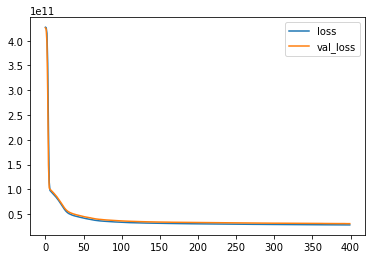

In [52]:
model_data=pd.DataFrame(model.history.history)
model_data.plot()

In [67]:
tf.keras.models.save_model(model,'KC_House')
load_model=tf.keras.models.load_model('KC_House')

INFO:tensorflow:Assets written to: KC_House\assets


In [65]:
prediction=model.predict(X_test)
mean_squared_error(y_test,prediction)
mean_absolute_error(y_test,prediction)
explained_variance_score(y_test,prediction)

0.7752362464326177

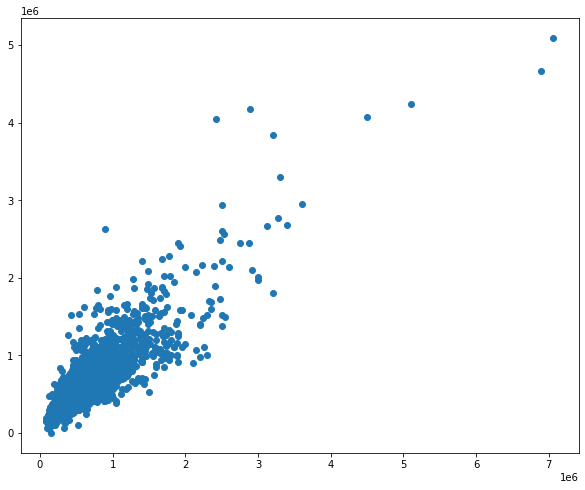

In [61]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,prediction)

# Linear regression model 

Text(27.0, 0.5, 'Y_predict')

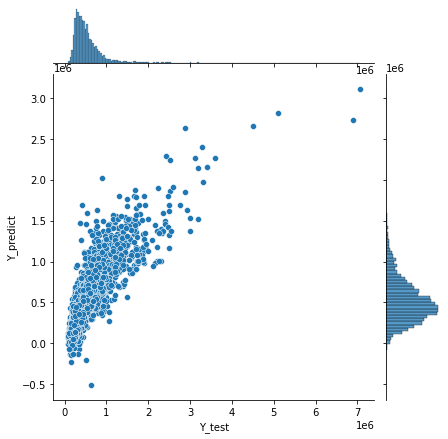

In [76]:
model_l=LinearRegression()
model_l.fit(X_train,y_train)
y_predict=model_l.predict(X_test)
h=sns.jointplot(x=y_test,y=y_predict)
h.ax_joint.set_xlabel("Y_test")
h.ax_joint.set_ylabel("Y_predict")